In [2]:
## Found at https://stackoverflow.com/questions/8032642/how-to-obtain-image-size-using-standard-python-class-without-using-external-lib

import struct
import imghdr

def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            return
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                return
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                return
        else:
            return
        return width, height

In [3]:
import os
image_sizes = []

character_image_files = os.listdir('saltybetdata/scraping_scripts/character_images/')

for character_image_file in character_image_files:
    image_sizes.append(get_image_size('saltybetdata/scraping_scripts/character_images/' + character_image_file))

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

image_matrix = np.array([[x[0], x[1]] for x in image_sizes if x != None])
image_matrix.shape

(9552, 2)

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


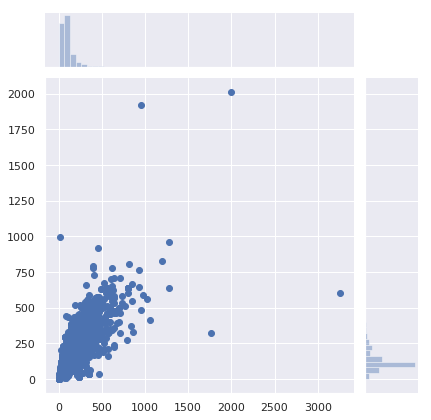

In [8]:
sns.jointplot(x=image_matrix[:,0], y=image_matrix[:,1])

In [15]:
import pandas as pd

image_size_df = pd.DataFrame(image_matrix, columns=['Width (px)', 'Height (px)'])

In [21]:
sns.set(rc={'figure.facecolor':'#F2F2F2'})

In [25]:
len(image_size_df[(image_size_df['Width (px)'] > 500)&(image_size_df['Height (px)'] > 500)])

52

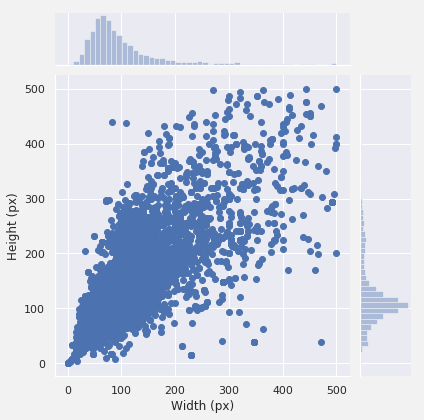

In [22]:
filtered_df = image_size_df[(image_size_df['Width (px)'] <= 500)&(image_size_df['Height (px)'] <= 500)]
sns.jointplot(x=filtered_df['Width (px)'], y=filtered_df['Height (px)'])

In [27]:
filtered_df['Height (px)'].median()

110.0

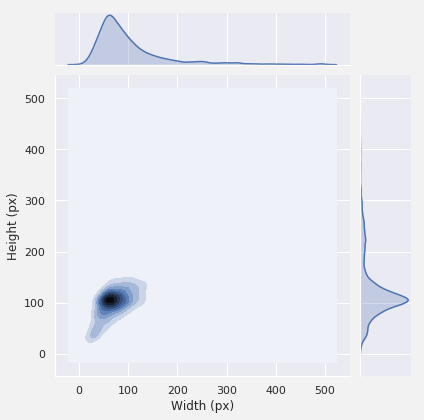

In [23]:
ax = sns.jointplot(x=filtered_df['Width (px)'], y=filtered_df['Height (px)'], kind='kde')